In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import h5py
import scib
import scipy.io as sio

In [2]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=200, frameon=False, figsize=(3,3), facecolor='white')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asttokens           NA
backcall            0.2.0
cffi                1.15.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.0
deprecated          1.2.12
executing           1.2.0
google              NA
h5py                3.7.0
igraph              0.10.2
ipykernel           6.23.1
jedi                0.18.2
joblib              1.0.1
kiwisolver          1.3.1
leidenalg           0.9.0
llvmlite            0.39.1
matplotlib          3.4.2
matplotlib_inline   0.1.6
mpl_toolkits        NA
natsort             8.2.0
numba               0.56.3
numpy               1.22.4
packaging           21.3
pandas              1.5.1
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.38
psutil              5.

/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [3]:
dataset_name = ["cell_lines", "panc8_rm", "uc3", "crc"]
methods = ['alra', 'dca', 'deepimpute', 'magic', 'saver', 'scimpute', 'scscope', 'scvi']

In [4]:
i=3 # data
j=7 # methods
re=0.1

In [5]:
# load raw data
adata_raw = sc.read_h5ad('/home/suyanchi/project/dab/data/batch/'+dataset_name[i]+'.h5ad')
adata_raw

AnnData object with n_obs × n_vars = 54285 × 12667
    obs: 'ClusterID', 'ClusterName', 'Global_Cluster', 'Platform', 'Sample', 'Sub_Cluster', 'Sub_ClusterID', 'Tissue', 'batch'
    var: 'Selected-10X', 'vst_mean-10X', 'vst_variable-10X', 'vst_variance-10X', 'vst_variance_expected-10X', 'vst_variance_standardized-10X', 'Selected-Smart-seq2', 'vst_mean-Smart-seq2', 'vst_variable-Smart-seq2', 'vst_variance-Smart-seq2', 'vst_variance_expected-Smart-seq2', 'vst_variance_standardized-Smart-seq2'
    uns: 'ClusterName_colors', 'Global_Cluster_colors', 'Platform_colors', 'Sample_colors', 'Sub_Cluster_colors', 'Tissue_colors', 'batch_colors'
    obsm: 'pca_cell_embeddings', 'umap_cell_embeddings'
    layers: 'norm_data', 'scale_data'

In [35]:
print('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_'+methods[j]+'.h5')

/home/suyanchi/project/dab/results/batch/crc_dca.h5


In [ ]:
dat_sc = sio.loadmat('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_'+methods[j]+'.mat')
dat_sc['data']

In [6]:
if j in [4,5]:
    dat_sc = sio.loadmat('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_'+methods[j]+'.mat')['data']
else:
    f = h5py.File('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_'+methods[j]+'.h5')
    dat_sc = f['data']
    f.close
    dat_sc = np.array(dat_sc)
if dat_sc.shape!=adata_raw.shape:
    dat_sc = dat_sc.T
adata_raw.X = dat_sc

adata_raw

AnnData object with n_obs × n_vars = 54285 × 12667
    obs: 'ClusterID', 'ClusterName', 'Global_Cluster', 'Platform', 'Sample', 'Sub_Cluster', 'Sub_ClusterID', 'Tissue', 'batch'
    var: 'Selected-10X', 'vst_mean-10X', 'vst_variable-10X', 'vst_variance-10X', 'vst_variance_expected-10X', 'vst_variance_standardized-10X', 'Selected-Smart-seq2', 'vst_mean-Smart-seq2', 'vst_variable-Smart-seq2', 'vst_variance-Smart-seq2', 'vst_variance_expected-Smart-seq2', 'vst_variance_standardized-Smart-seq2'
    uns: 'ClusterName_colors', 'Global_Cluster_colors', 'Platform_colors', 'Sample_colors', 'Sub_Cluster_colors', 'Tissue_colors', 'batch_colors'
    obsm: 'pca_cell_embeddings', 'umap_cell_embeddings'
    layers: 'norm_data', 'scale_data'

In [7]:
sc.pp.pca(adata_raw)
sc.pp.neighbors(adata_raw)
sc.tl.umap(adata_raw)

/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


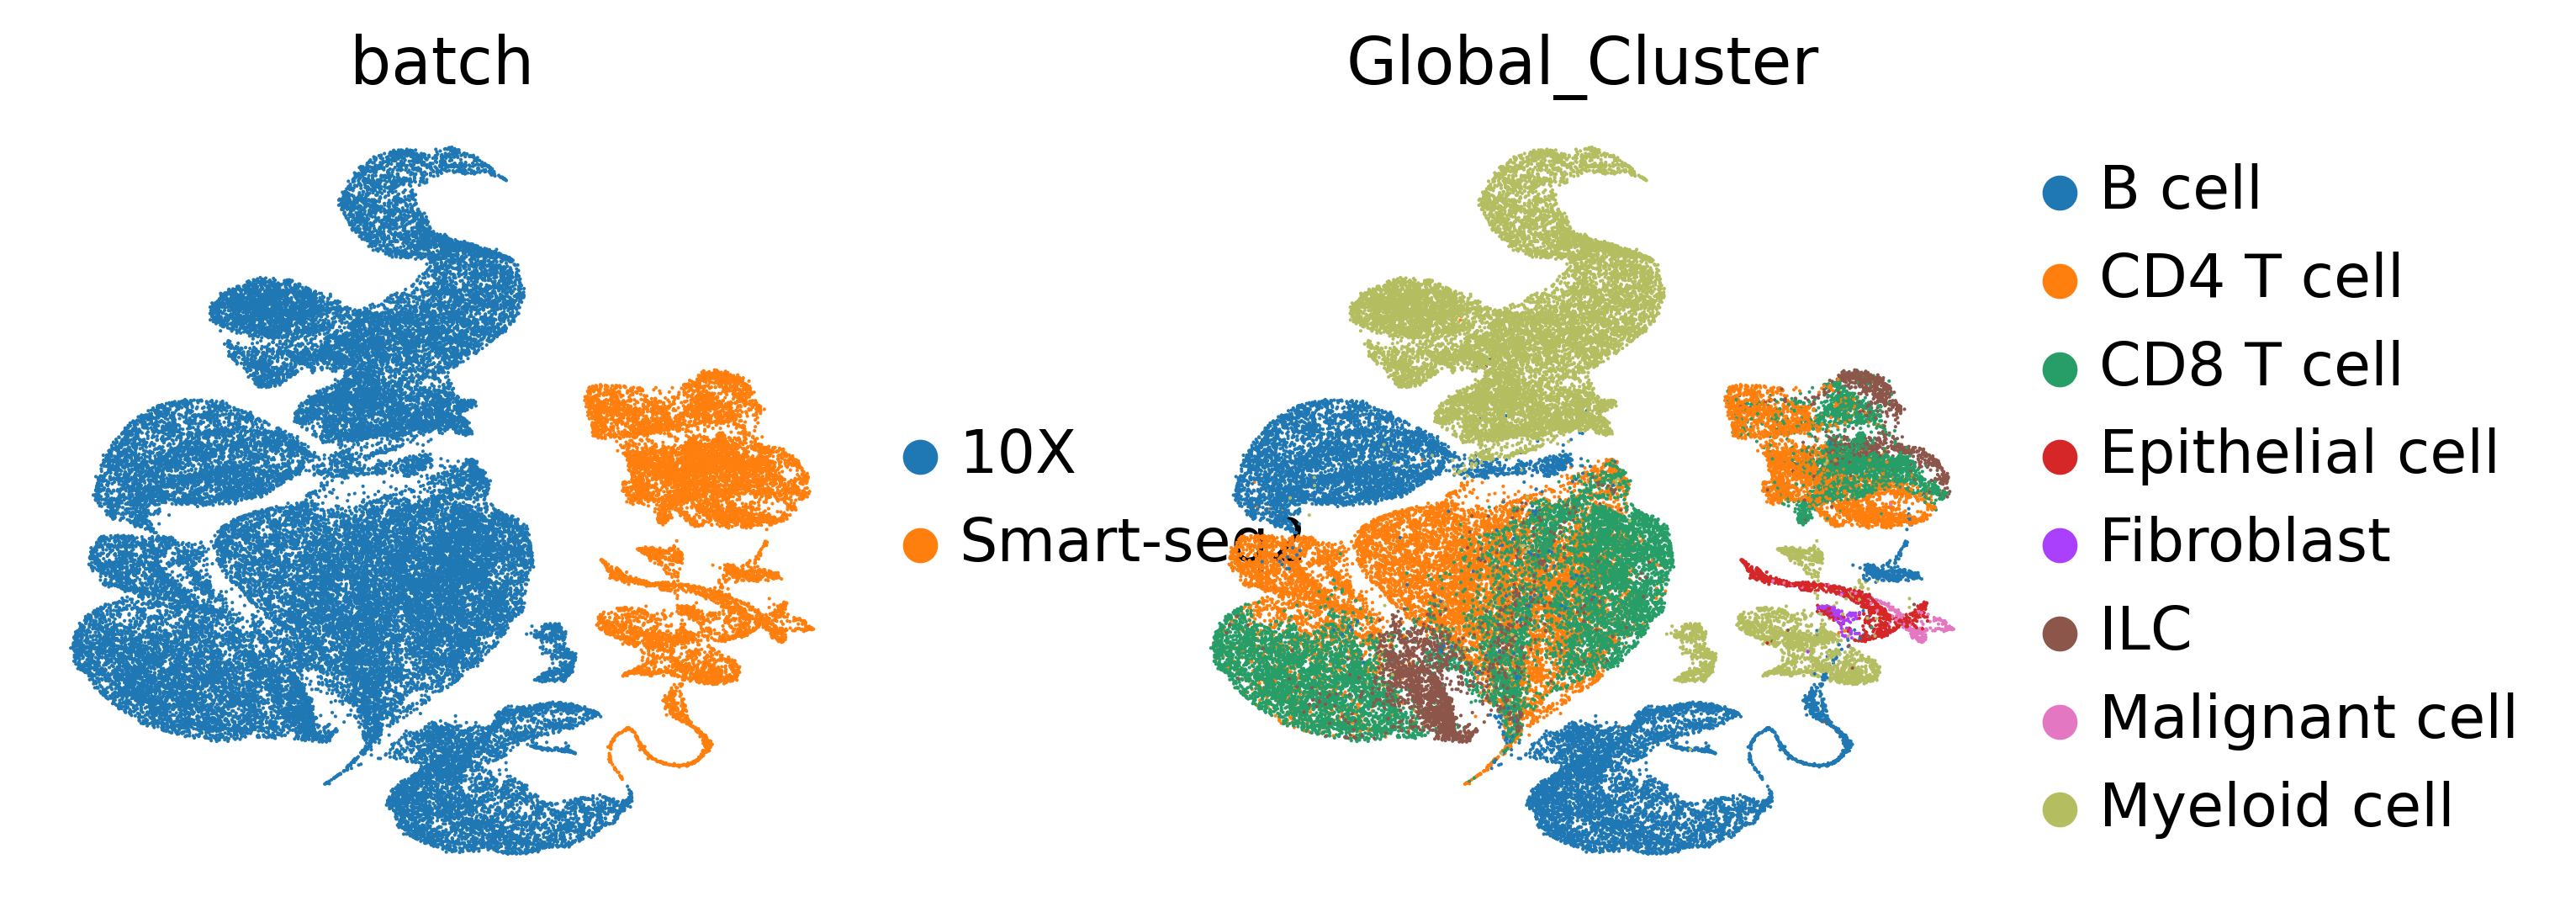

In [8]:
sc.pl.umap(adata_raw, color=['batch', 'Global_Cluster'], palette=sc.pl.palettes.vega_20_scanpy)

In [9]:
%%time
sc.external.pp.bbknn(adata_raw, batch_key='batch')

CPU times: user 4.25 s, sys: 154 ms, total: 4.41 s
Wall time: 3.51 s


In [10]:
sc.tl.umap(adata_raw)

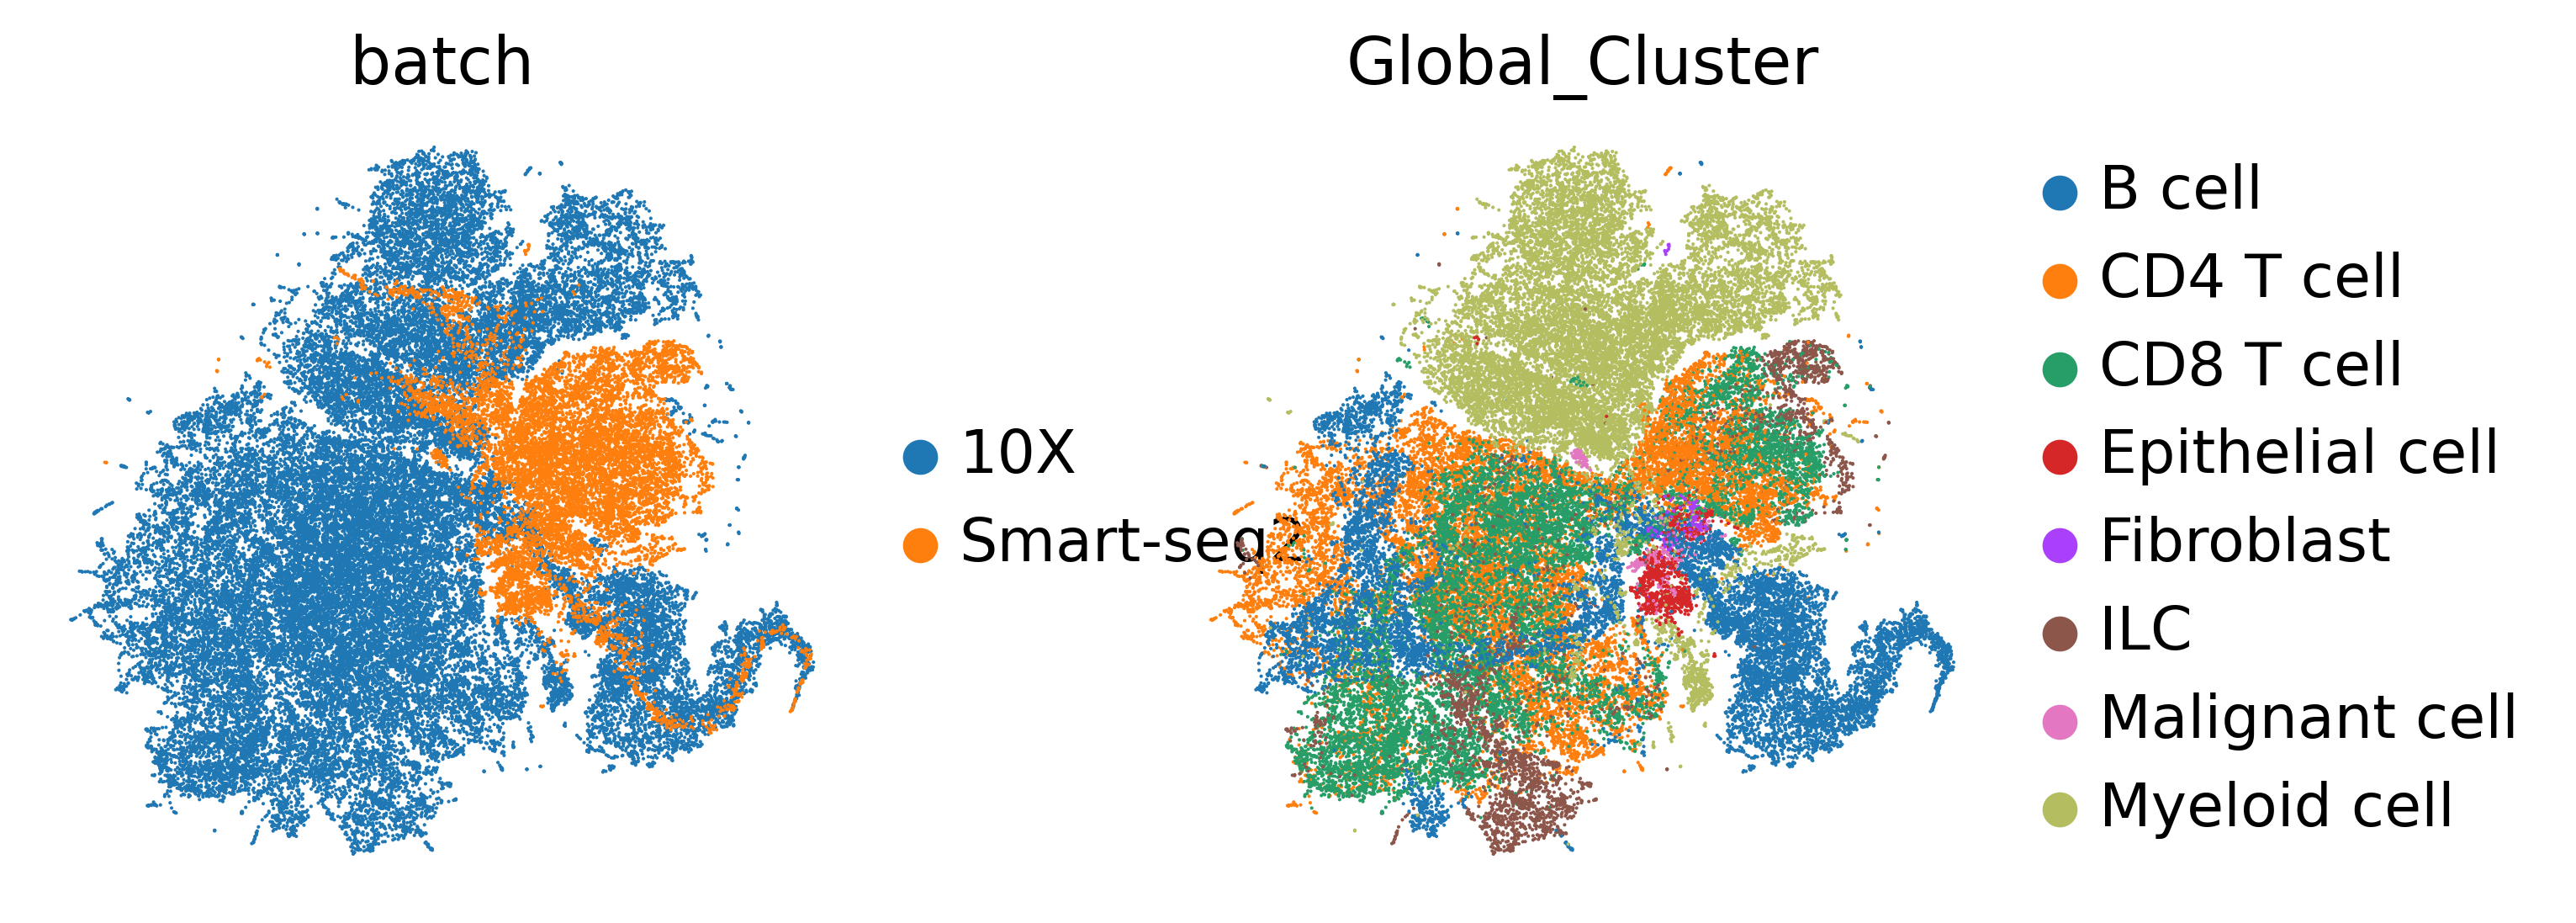

In [11]:
sc.pl.umap(adata_raw, color=['batch', 'Global_Cluster'])

In [12]:
sc.tl.leiden(adata_raw, resolution=re)

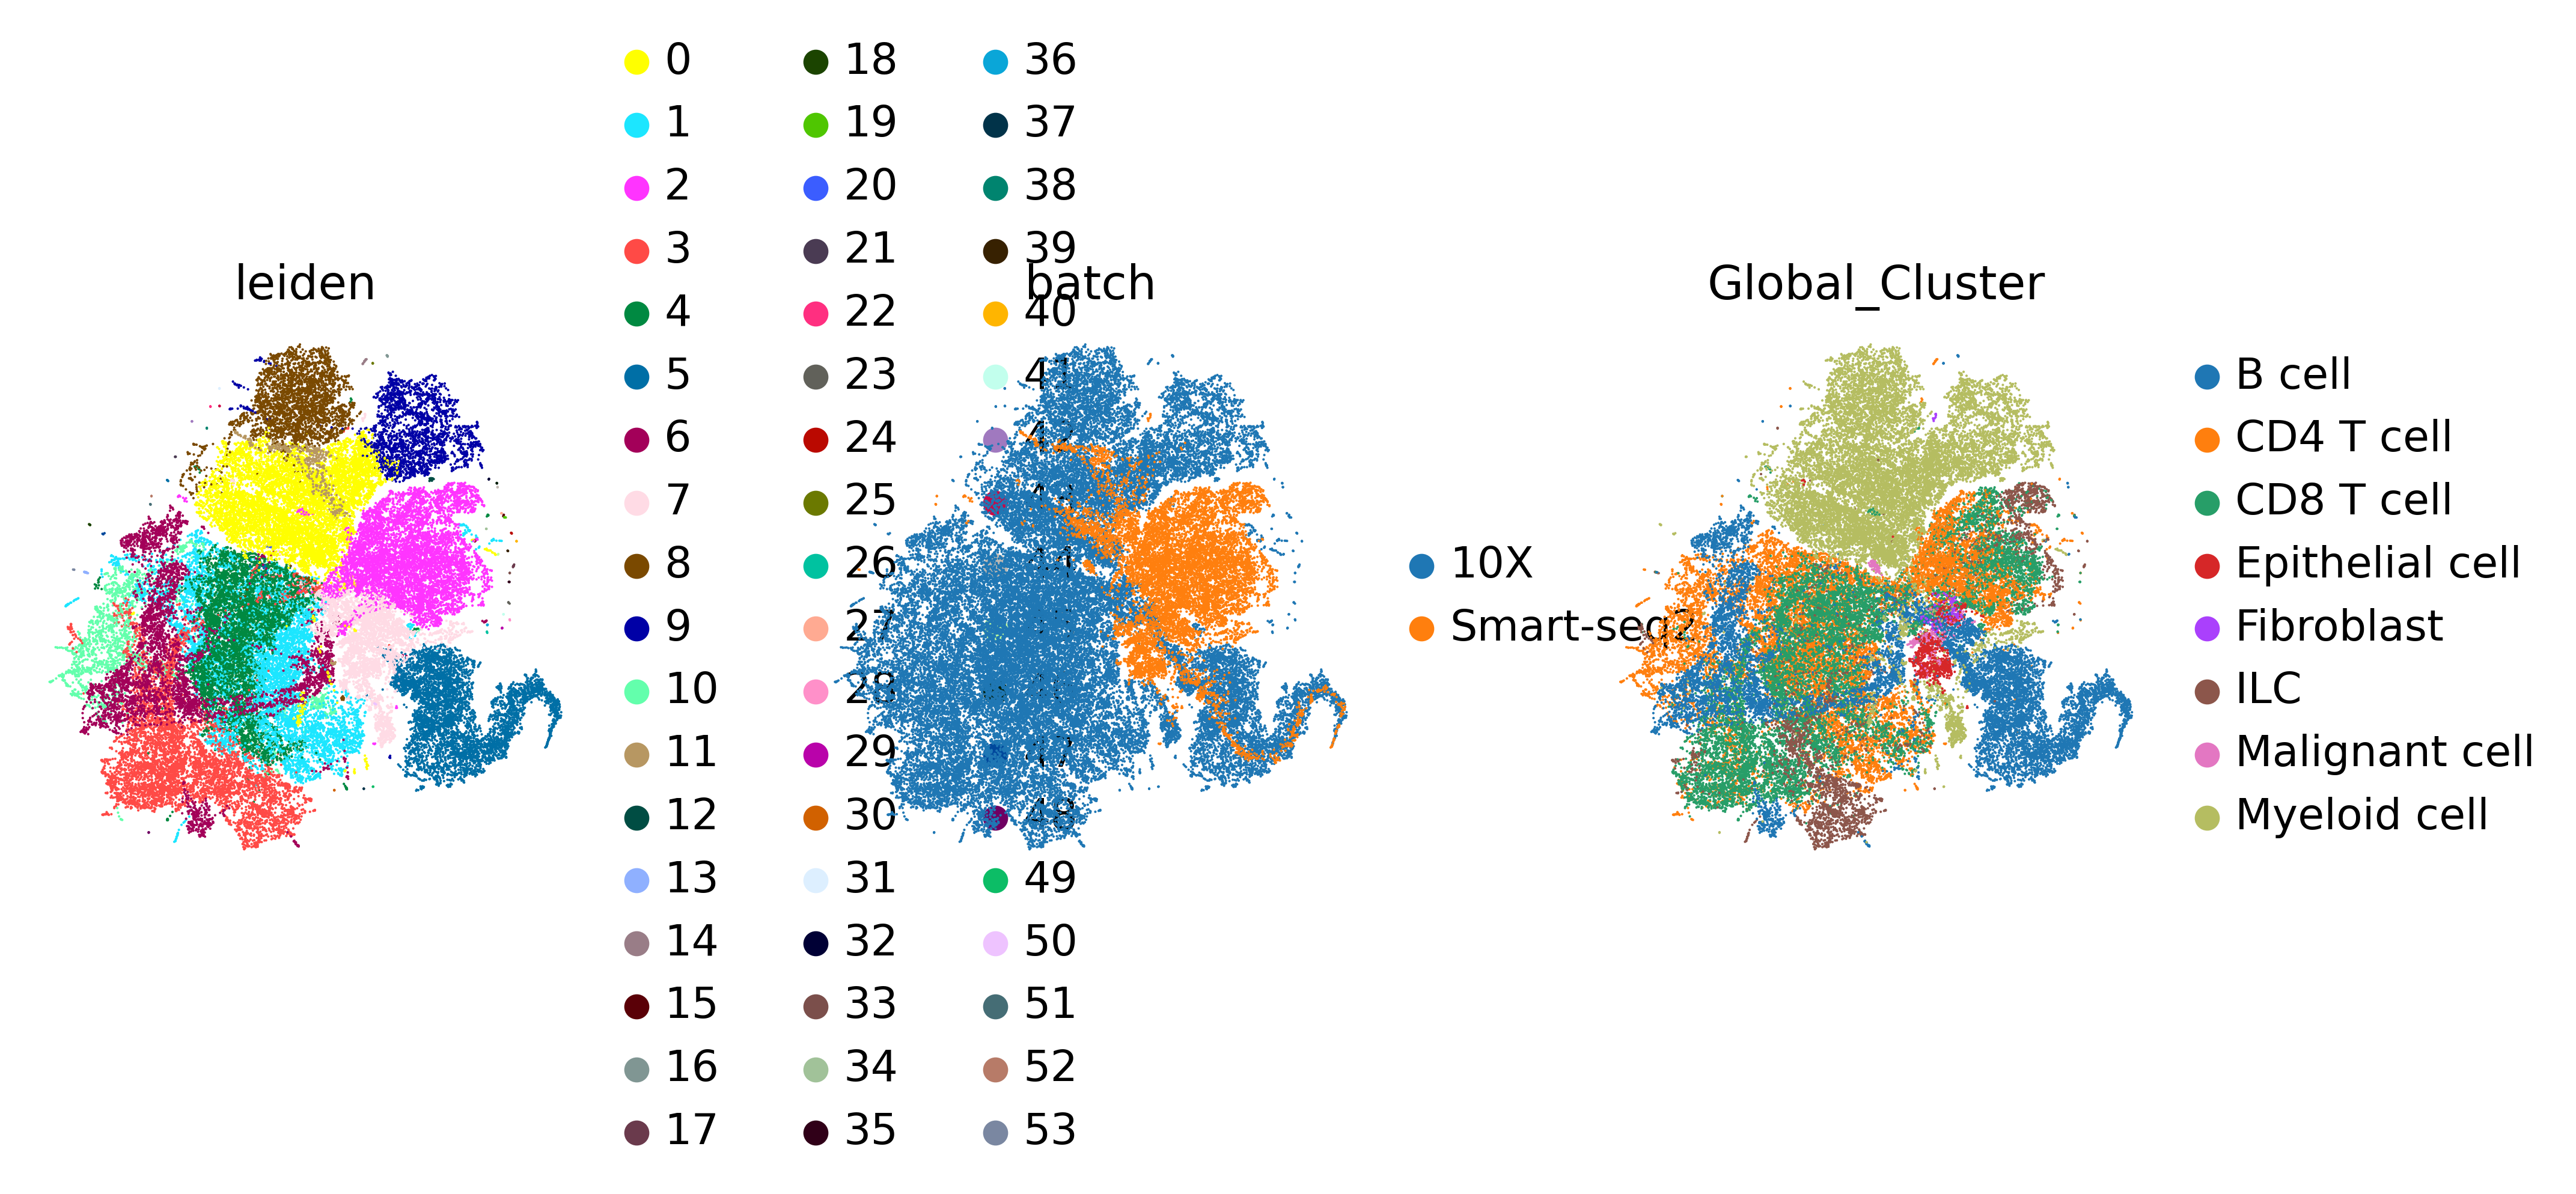

In [13]:
sc.pl.umap(adata_raw, color=['leiden', 'batch', 'Global_Cluster'])

In [14]:
# nmi = normalized_mutual_info_score(adata_raw.obs['celltype'], adata_raw.obs['leiden'])
# ari = adjusted_rand_score(adata_raw.obs['celltype'], adata_raw.obs['leiden'])
# print('ARI: {:.4f}, NMI: {:.4f}'.format(ari, nmi))

In [15]:
ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='Global_Cluster')
nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='Global_Cluster')
asw = scib.metrics.silhouette(adata_raw, label_key='Global_Cluster', embed='X_pca')
b_asw = scib.metrics.silhouette_batch(adata_raw, batch_key='batch', label_key='Global_Cluster', embed='X_pca', verbose=False)
print('ARI: {:.4f}, NMI: {:.4f}, ASW: {:.4f}, batch-ASW: {:.4f}'.format(ari, nmi, asw, b_asw))

/tmp/ipykernel_80830/2770285078.py:1: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='Global_Cluster')
/tmp/ipykernel_80830/2770285078.py:1: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='Global_Cluster')
/tmp/ipykernel_80830/2770285078.py:2: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='Global_Cluster')
/tmp/ipykernel_80830/2770285078.py:2: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden

ARI: 0.3337, NMI: 0.5276, ASW: 0.4537, batch-ASW: 0.4533


In [16]:
df = pd.read_csv('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_metric.csv', header=0, index_col=0)
df

Methods       ARI       NMI       ASW     b_ASW
0     Dropout  0.374359  0.477155  0.385713  0.148991
0        alra  0.136268  0.482926  0.554527  0.476607
0         dca  0.231845  0.475200  0.386958  0.128894
0  deepimpute  0.399870  0.495630  0.385089  0.147863
0       magic  0.169950  0.395595  0.381747  0.129540
0     scscope  0.315589  0.397916  0.386452  0.149797

In [17]:
# combineing results 
df1 = pd.DataFrame({'Methods': [methods[j]],
                   'ARI': [ari],
                   "NMI": [nmi],
                   "ASW": [asw],
                   "b_ASW": [b_asw]})
df = pd.concat([df, df1])
df

Methods       ARI       NMI       ASW     b_ASW
0     Dropout  0.374359  0.477155  0.385713  0.148991
0        alra  0.136268  0.482926  0.554527  0.476607
0         dca  0.231845  0.475200  0.386958  0.128894
0  deepimpute  0.399870  0.495630  0.385089  0.147863
0       magic  0.169950  0.395595  0.381747  0.129540
0     scscope  0.315589  0.397916  0.386452  0.149797
0        scvi  0.333660  0.527634  0.453659  0.453321

In [18]:
adata_raw.write('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_'+methods[j]+'.h5ad')

In [ ]:
df.to_csv('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_metric.csv', sep=',')